In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
file_path = "health_insurance_dataset_updated.csv"
df = pd.read_csv(file_path)

In [14]:
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])  # Male=1, Female=0
df['Smoke'] = label_enc.fit_transform(df['Smoke'])    # Yes=1, No=0
df['Approval Status'] = label_enc.fit_transform(df['Approval Status'])  

In [15]:
df = pd.get_dummies(df, columns=['Health Problem'], drop_first=True)

In [16]:
X = df.drop(columns=['Approval Status'])
y = df['Approval Status']

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

scaler = StandardScaler()
X_train[['Age', 'BMI', 'No. of Hospital Visits', 'Claim Amount Requested (₹)']] = scaler.fit_transform(X_train[['Age', 'BMI', 'No. of Hospital Visits', 'Claim Amount Requested (₹)']])
X_test[['Age', 'BMI', 'No. of Hospital Visits', 'Claim Amount Requested (₹)']] = scaler.transform(X_test[['Age', 'BMI', 'No. of Hospital Visits', 'Claim Amount Requested (₹)']])

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Predictions
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.66      0.54      0.59       130
           1       0.95      0.97      0.96      1070

    accuracy                           0.92      1200
   macro avg       0.80      0.75      0.77      1200
weighted avg       0.91      0.92      0.92      1200



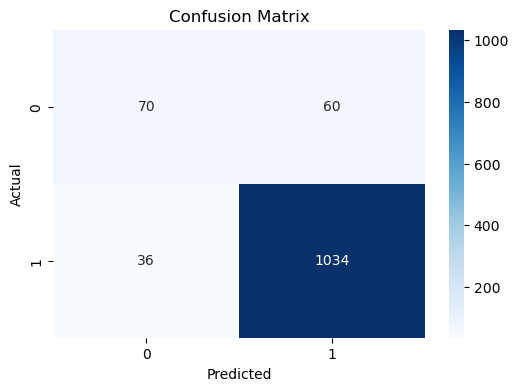

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
with open('hel_claim_model.pkl', 'wb') as file:
    print('Saving model...')
    pickle.dump(model, file)

Saving model...
